In [11]:
from __future__ import print_function
import argparse, os, sys, random, time, datetime
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
#
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
# from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import SubsetRandomSampler, Sampler, Subset, ConcatDataset, random_split
#
from custom_models import *
from custom_datasets import *
from custom_transforms import *
from utils import *
import logging
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [9]:
path = '/mnt/Nami/rayeh/Med_AutoDO/local_data/med/exp4_allData/best_UNet_e200_opt_HES_est_True_aug_model_SEP_los_model_NONE_ir_1_sr_1.0_nr_0.0.pt'
pt = torch.load(path)

In [10]:
print(pt.keys())
augment_model = pt['augment_state_dict']
print(augment_model)

dict_keys(['Dnn_model_state_dict', 'reweight_state_dict', 'augment_state_dict', 'acc', 'epoch'])
OrderedDict([('paramP', tensor([[-3.7614, -7.4814, -0.5420,  ..., -0.4146, -3.0148, -0.5845],
        [-2.4746,  3.2096, -6.5438,  ..., -7.8396,  0.3011,  0.1848],
        [ 8.7331, -0.2437, -0.8378,  ...,  5.4416,  0.6733,  1.5225],
        ...,
        [-3.9296, -7.5124, -6.1876,  ..., -2.3935,  4.5814, -2.6161],
        [-4.2941,  0.3316, -2.3878,  ..., -6.9723, -2.9160, -3.3164],
        [-4.6073, -7.1917,  2.0258,  ...,  5.0195, -6.4174,  3.5772]],
       device='cuda:0')), ('paramM', tensor([[-1.7972e+00, -3.8378e-01, -9.4109e-01,  ..., -4.3908e-01,
          9.0999e-02, -6.5930e-01],
        [ 3.0730e+00, -2.4901e+00,  1.6357e-01,  ..., -7.3324e-01,
         -9.6547e-02,  6.1186e-01],
        [ 2.7118e+00, -1.3630e+00,  5.5374e-01,  ...,  3.1259e-01,
          2.9924e+00, -2.7331e+00],
        ...,
        [-1.2455e+00,  2.4332e+00, -3.6827e-01,  ..., -9.6203e-02,
          1.3498e+0

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)
 
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
 
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)
 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
 
# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
 
plt.show()

In [2]:
trainAugModel = Med_AugmentModel_2(N=data_len, magn=5, apply=True,  mode=1, grad=True, device='cpu')

In [3]:
loader = iter(train_loader)

In [25]:
data = next(loader)
idx = data['idx']
rgb = data['image']
mask = data['mask']

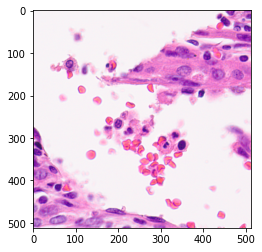

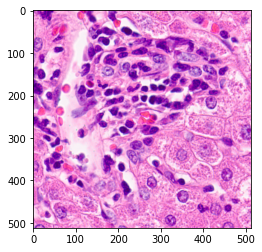

In [26]:
img = torch.permute(rgb[0], (1,2,0)).numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = torch.permute(rgb[1], (1,2,0)).numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

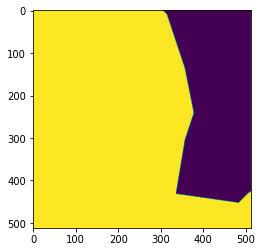

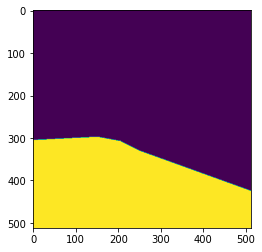

In [14]:
img = mask[0].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = mask[1].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

In [27]:
aug_data = trainAugModel(idx,data)

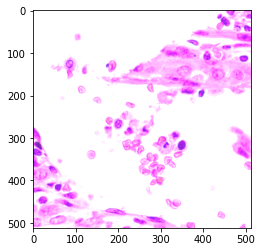

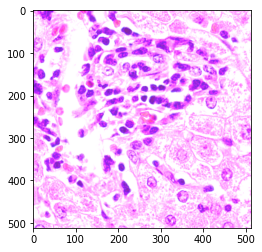

In [28]:
aug = aug_data['image']
aug_mask = aug_data['mask']
img = torch.permute(aug[0], (1,2,0)).detach().numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = torch.permute(aug[1], (1,2,0)).detach().numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

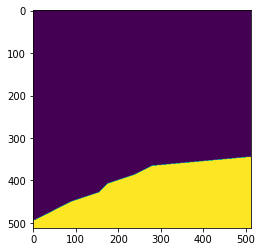

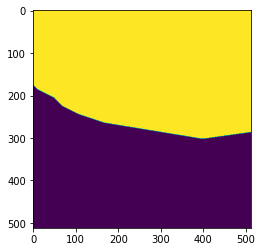

In [9]:
img = aug_mask[0].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = aug_mask[1].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

In [10]:
# print(sum(data['image'].view(-1,1))-sum(aug_data['image'].view(-1,1)))

In [11]:
print(aug_data['aug_ops'][0])

[('brightness', tensor([-0.4674])), ('contrast', tensor([-0.2407])), ('saturation', tensor([0.5222])), ('Hsv', tensor([ 0.4281,  0.5206, -0.4165])), ('Hed', tensor([ 0.0410, -0.8179, -0.4944])), ('gaussian blur', tensor([-0.0212])), ('sharpen', tensor([-0.1970])), ('gaussian noise', tensor([0.9704])), ('elastic transform', tensor([-0.2088])), ('Rotate', tensor([-0.0031])), ('TranslateX', tensor([0.8650])), ('TranslateY', tensor([0.7038])), ('ShearX', tensor([0.6169])), ('ShearY', tensor([0.6642])), ('Equalize', tensor([-0.4674]))]
